<a href="https://colab.research.google.com/github/YihanMou0511/Machine-Learning/blob/main/HW4_IN_CLASS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/441B/fraudTest.csv")

In [5]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [8]:
df_select=df[['trans_date_trans_time','category','amt','city_pop',"is_fraud"]]
df_select['trans_date_trans_time']=pd.to_datetime(df_select['trans_date_trans_time'])
df_select['time_var']=[i.hour for i in df_select['trans_date_trans_time']]
df_select['time_var']=[1 if i <6 else 0 for i in df_select['time_var']]
x=pd.get_dummies(df_select,['category']).drop(['trans_date_trans_time','is_fraud'],axis=1)
y=df['is_fraud']

<ipython-input-8-978fb98b3deb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['trans_date_trans_time']=pd.to_datetime(df_select['trans_date_trans_time'])
<ipython-input-8-978fb98b3deb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['time_var']=[i.hour for i in df_select['trans_date_trans_time']]
<ipython-input-8-978fb98b3deb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.3)

In [11]:
x_train.head()

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
373116,49.76,2523,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
212903,6.18,878,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
478487,10.70,77,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
521230,76.22,7420,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
423264,31.10,341,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [12]:
#SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
resample_x_sm, resample_y_sm = sm.fit_resample(x_train, y_train)

In [14]:
#oversample
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
resample_x_os, resample_y_os = ros.fit_resample(x_train, y_train)

In [15]:
#undersample
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=0)
resample_x_us, resample_y_us = rus.fit_resample(x_train, y_train)

# 3.) Train three logistic regression models 

In [16]:
from sklearn.linear_model import LogisticRegression

In [21]:
log_reg_sm = LogisticRegression().fit(resample_x_sm, resample_y_sm)

In [22]:
log_reg_os = LogisticRegression().fit(resample_x_os, resample_y_os)

In [24]:
log_reg_us = LogisticRegression().fit(resample_x_us, resample_y_us)

# 4.) Test the three models

In [25]:
#SMOTE
print('Accuracy of SMOTE:', log_reg_sm.score(x_test,y_test))

Accuracy of SMOTE: 0.1735826195446148


In [26]:
#oversample
print('Accuracy of Oversample:', log_reg_os.score(x_test,y_test))

Accuracy of Oversample: 0.17249694090549197


In [27]:
#Undersample
print('Accuracy of Undersample:', log_reg_us.score(x_test,y_test))

Accuracy of Undersample: 0.17430840471220518


# 5.) Which performed best in Out of Sample metrics?

According to the accuracy results above, undersampling performs best in out of sample metrics.


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [28]:
raw_temp=pd.concat([x_train,y_train],axis=1)

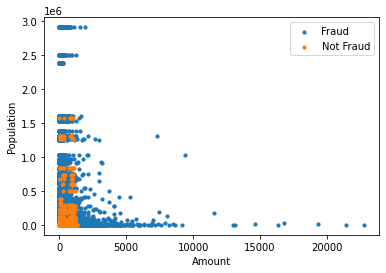

In [34]:
plt.scatter(raw_temp[raw_temp['is_fraud']==0]['amt'],raw_temp[raw_temp['is_fraud']==0]['city_pop'],s=10)
plt.scatter(raw_temp[raw_temp['is_fraud']==1]['amt'],raw_temp[raw_temp['is_fraud']==1]['city_pop'],s=10)
plt.legend(['Fraud','Not Fraud'])
plt.xlabel('Amount')
plt.ylabel('Population')
plt.show()

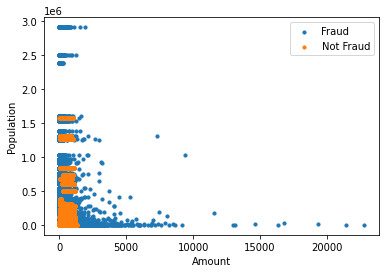

In [35]:
sm_temp=pd.concat([resample_x_sm, resample_y_sm],axis=1)
plt.scatter(sm_temp[sm_temp['is_fraud']==0]['amt'],sm_temp[sm_temp['is_fraud']==0]['city_pop'],s=10)
plt.scatter(sm_temp[sm_temp['is_fraud']==1]['amt'],sm_temp[sm_temp['is_fraud']==1]['city_pop'],s=10)
plt.legend(['Fraud','Not Fraud'])
plt.xlabel('Amount')
plt.ylabel('Population')
plt.show()